['BPI_Challenge_2020', 'BPI_Challenge_2020_DomesticDeclarations', 'RTFM']
{'α+++|4.0|b0.1|t0.9|r0.9', 'α+++|2.0|b0.1|t0.9|r0.9', 'α+++|4.0|b0.2|t0.8|r0.7', 'α+++|2.0|b0.2|t0.8|r0.7', 'α+++|4.0|b0.5|t0.5|r0.5', 'α+++|2.0|b0.2|t0.8|r0.8', 'α+++|4.0|b0.3|t0.7|r0.6', 'α+++|2.0|b0.3|t0.7|r0.6', 'α+++|4.0|b0.2|t0.8|r0.8', 'α+++|2.0|b0.5|t0.5|r0.5'}
['α+++|2.0|b0.5|t0.5|r0.5', 'α+++|2.0|b0.3|t0.7|r0.6', 'α+++|2.0|b0.2|t0.8|r0.7', 'α+++|2.0|b0.2|t0.8|r0.8', 'α+++|2.0|b0.1|t0.9|r0.9', 'α+++|4.0|b0.5|t0.5|r0.5', 'α+++|4.0|b0.3|t0.7|r0.6', 'α+++|4.0|b0.2|t0.8|r0.7', 'α+++|4.0|b0.2|t0.8|r0.8', 'α+++|4.0|b0.1|t0.9|r0.9']
['BPI_Challenge_2020', 'BPI_Challenge_2020_DomesticDeclarations', 'RTFM']
['α+++|2.0|b0.5|t0.5|r0.5', 'α+++|2.0|b0.3|t0.7|r0.6', 'α+++|2.0|b0.2|t0.8|r0.7', 'α+++|2.0|b0.2|t0.8|r0.8', 'α+++|2.0|b0.1|t0.9|r0.9', 'α+++|4.0|b0.5|t0.5|r0.5', 'α+++|4.0|b0.3|t0.7|r0.6', 'α+++|4.0|b0.2|t0.8|r0.7', 'α+++|4.0|b0.2|t0.8|r0.8', 'α+++|4.0|b0.1|t0.9|r0.9']
['BPI_Challenge_2020', 'BPI_Challenge_2

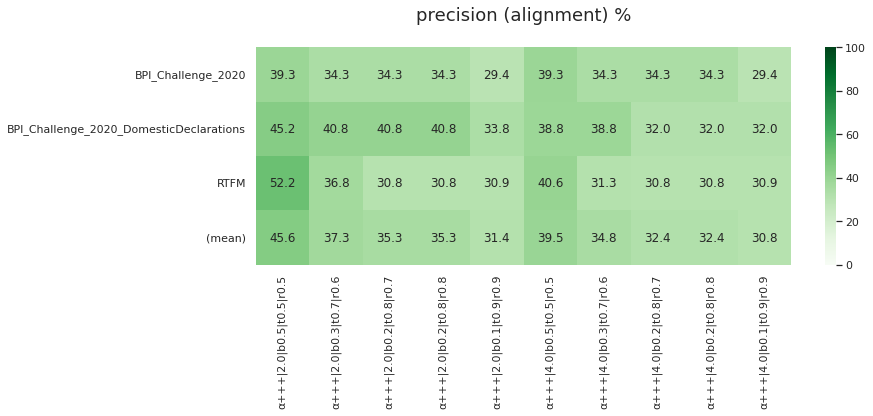

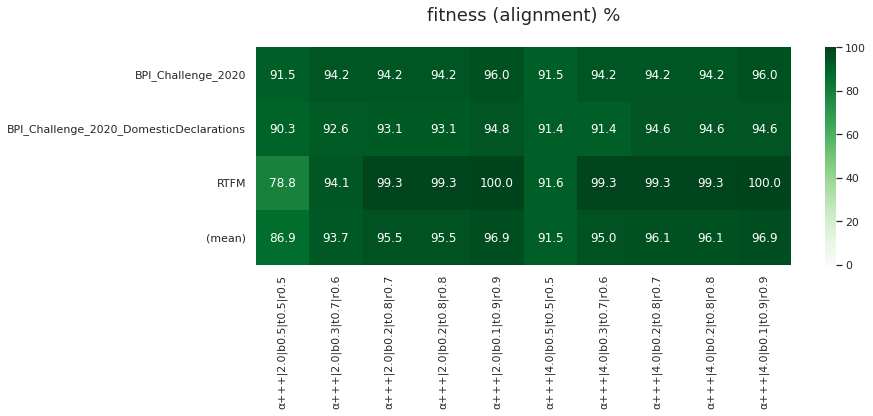

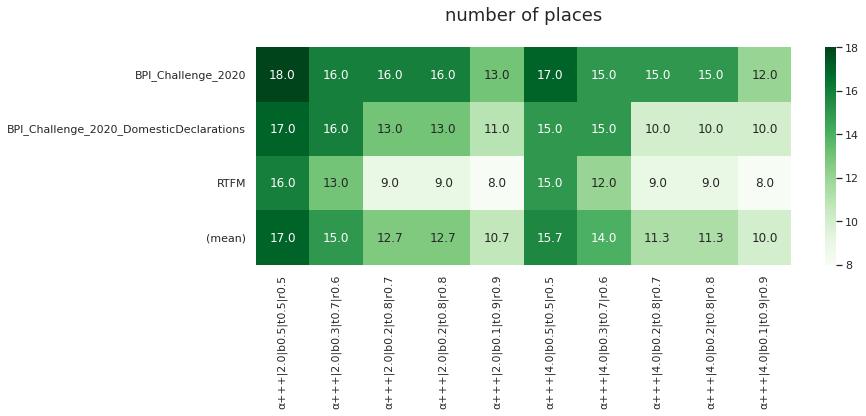

In [4]:
import pickle
from statistics import mean
from typing import Dict, Tuple
import seaborn
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import datetime

SAVE_FIGURES = False
FIGURE_PATH = "./figures/"
ADD_PATCHES_FOR_HIGHEST_VALUES = False
PATCHES_HIGHTEST_VALUE_TOLERANCE = 3
results : Dict[str,Dict] = dict()
result_pickle_paths = [
    # e.g.,
    # ('BPI_Challenge_2020','algo_resXXXX_BPI_Challenge_2020.pickle'),
    # ('BPI_Challenge_2020_DomesticDeclarations','algo_resXXXX_BPI_Challenge_2020_DomesticDeclarations.pickle'),
    # ('RTFM','algo_resXXXX_RTFM.pickle'),
    # ('Sepsis','algo_resXXXX_Sepsis.pickle'),
    # ('BPI_Challenge_2019_sampled_3000cases','algo_resXXXX_BPI_Challenge_2019_sampled_3000cases.pickle'),
  ]
  # log name -> (algo name -> ((id,values)))
overall_data: Dict[str,Dict[str,Dict[str,Dict[str,float]]]] = dict()


def addToOverallData(log_name: str, algo_name: str, id: str, field: str, value: float):
  if log_name not in overall_data:
    log_dict = dict()
  else:
    log_dict = overall_data.get(log_name)
  overall_data[log_name] = log_dict

  if algo_name not in log_dict:
    algo_dict = dict()
  else:
    algo_dict = log_dict.get(algo_name)
  log_dict[algo_name] = algo_dict

  if id not in algo_dict:
    value_dict = dict()
  else:
    value_dict = algo_dict.get(id)
  algo_dict[id] = value_dict

  value_dict[field] = value
for (name,path) in result_pickle_paths:
  with open(FIGURE_PATH + path,'rb') as f:
    p = pickle.load(f)
    results[name] = p
    for algo_name in p:
      for field in p[algo_name]:
        addToOverallData(name,algo_name,path,field,p[algo_name][field])

logs_to_ignore = {
  # 'RTFM',
  # 'Sepsis',
  # 'BPI_Challenge_2019_sampled_3000cases',
  # 'BPI_Challenge_2020',
  # 'BPI_Challenge_2020_DomesticDeclarations',
  }
logs = [log for log in overall_data.keys() if log not in logs_to_ignore]
available_algo_data = set(overall_data[logs[0]].keys())
for log in logs:
  available_algo_data.intersection_update(overall_data[log].keys())
print(logs)
print(available_algo_data)
fields = [
          # 'precision (token) %',
          'precision (alignment) %',
          'fitness (alignment) %',
          # 'fitness (token) %',
          # 'generalization %',
          # 'simplicity %',
          'number of places',
          # 'number of transitions',
          # 'number of arcs',
          # 'duration (s)'
          ]

def gather_data(log: str, algo: str):
  data = overall_data[log][algo]
  ret = dict()
  for f in fields:
    values = [d[f] for d in data.values() if not np.isnan(d[f]) and d[f] != 0]
    std = np.std(values)
    if std > 0.1 and f != 'duration (s)':
      print("Warning! Deviation in values for field " + f + " for " + algo.replace('\n',' ') + " on " + log + " (" + str(std) + ")")
      print(values)
      print(mean(values))
      print(data.keys())
      print("Selecting value " + str(values[-1]) )
      print("---")
    if len(values) > 0:
     ret[f] = values[-1] 
    else:
      ret[f] = np.nan
  return ret

algos_to_use =   list(available_algo_data)  
algos_to_use =  [
        # Inductive Miner 
        "IMf 0.1",
        "IMf 0.2",
        "IMf 0.3",
        "IMf 0.4",
        # Alpha Variants
        "α Top1",
        "α Top5",
        "α Top10",
        "α 10%Cov",
        "α 50%Cov",
        "α 80%Cov",
        # Alpha+++ Variants
        "α+++|2.0|b0.5|t0.5|r0.5",
        "α+++|2.0|b0.3|t0.7|r0.6",
        "α+++|2.0|b0.2|t0.8|r0.7",
        "α+++|2.0|b0.2|t0.8|r0.8",
        "α+++|2.0|b0.1|t0.9|r0.9",
        "α+++|4.0|b0.5|t0.5|r0.5",
        "α+++|4.0|b0.3|t0.7|r0.6",
        "α+++|4.0|b0.2|t0.8|r0.7",
        "α+++|4.0|b0.2|t0.8|r0.8",
        "α+++|4.0|b0.1|t0.9|r0.9",
  ]
results = dict();
for log in logs:
  results[log] = {algo: gather_data(log,algo)  for algo in algos_to_use if algo in available_algo_data}


fields = list(list(list(results.values())[0].values())[0].keys())
winner = Counter()
means = list()
means_per_algo = dict()
for f in fields:
  values = [[x[f]  if x[f] != 0 else np.nan for x in results[r].values()] for r in results]
  keys = list(results.keys())
  names = [n for n in list(list(results.values())[0].keys())]
  print(names)
  print(keys)
  m = [mean([v[i] for v in values]) for i in range(len(values[0]))]
  means.append(m)
  values.append(m)
  keys.append("(mean)")
  

  fig = plt.figure(figsize=(12,4))
  seaborn.set(rc={"figure.figsize":(12, 4)})
  ax = seaborn.heatmap(values,xticklabels=names,yticklabels=keys, annot=True, fmt=".1f",cmap="Greens", vmin=0.0 if '%' in f else None, vmax=100.0 if '%' in f else None)
  ax.set_title(f + "\n", weight='normal').set_fontsize('18')
  if ADD_PATCHES_FOR_HIGHEST_VALUES:
    for (i,vs) in enumerate(values):
      maxVal = 0
      for (j,v) in enumerate(vs):
        if v > maxVal:
          maxVal = v
      if maxVal > 0:
        for j,v in enumerate(vs):
          if v >= maxVal - PATCHES_HIGHTEST_VALUE_TOLERANCE:
            winner.update([names[j]])
            ax.add_patch(Rectangle((j,i),1,1, fill=False, edgecolor='black', lw=2))
  
  time_stamp = datetime.datetime.now().isoformat()
  if SAVE_FIGURES:
    ax.get_figure().savefig(FIGURE_PATH + time_stamp + "_" +f + "_comparison.svg", bbox_inches='tight')


In [5]:
import csv
from numpy import isnan, nan

# Generate CSV from results
def generateCSV():
    # Ordering
    logs = ["RTFM", "Sepsis", "BPI_Challenge_2019_sampled_3000cases", "BPI_Challenge_2020", "BPI_Challenge_2020_DomesticDeclarations"]
    algo_order = [
        # Inductive Miner 
        "IMf 0.1",
        "IMf 0.2",
        "IMf 0.3",
        "IMf 0.4",
        # Alpha Variants
        "α Top10",
        "α 10%Cov",
        "α 50%Cov",
        "α 80%Cov",
        #  Alpha+++
        "α+++|2.0|b0.5|t0.5|r0.5",
        "α+++|2.0|b0.3|t0.7|r0.6",
        "α+++|2.0|b0.2|t0.8|r0.7",
        "α+++|2.0|b0.2|t0.8|r0.8",
        "α+++|2.0|b0.1|t0.9|r0.9",
        
        "α+++|4.0|b0.5|t0.5|r0.5",
        "α+++|4.0|b0.3|t0.7|r0.6",
        "α+++|4.0|b0.2|t0.8|r0.7",
        "α+++|4.0|b0.2|t0.8|r0.8",
        "α+++|4.0|b0.1|t0.9|r0.9",
    ]
    print(len(algo_order))
    def format_float_nicely(f: float, divideBy100 = False):
        if isnan(f):
            return 'nan'
        else:
            if divideBy100:
                f = f / 100
            return "{:.4f}".format(f)
    def calculate_f1_score(fitnessPercent, precisionPercent):
        if isnan(fitnessPercent) or isnan(precisionPercent):
            return nan
        else:
            return 2*(precisionPercent/100 * fitnessPercent/100)/(precisionPercent/100 + fitnessPercent/100)
    measures = [
        # Fitness
        lambda x: format_float_nicely(x["fitness (alignment) %"],True),
        # Precision
        lambda x: format_float_nicely(x["precision (alignment) %"],True),
        # F1 Score
        lambda x: format_float_nicely(calculate_f1_score(x["fitness (alignment) %"], x["precision (alignment) %"])),
    ]
    time_stamp = datetime.datetime.now().isoformat()
    with open(
        f"{FIGURE_PATH}/table-data_{time_stamp}.csv",
        "w",
        newline="",
    ) as f:
        w = csv.writer(f)
        w.writerow(["" for _ in algo_order])
        for l in logs:
            r = results[l] if l in results else dict()
            for m in measures:
                row = []
                for a in algo_order:
                    if a in r:
                        row.append(m(r[a]))
                        print(m(r[a]))
                    else:
                        print(a + "not available for " + l)
                        row.append("-")
                w.writerow(row)
            w.writerow(["" for _ in algo_order])


generateCSV()


18
IMf 0.1not available for RTFM
IMf 0.2not available for RTFM
IMf 0.3not available for RTFM
IMf 0.4not available for RTFM
α Top10not available for RTFM
α 10%Covnot available for RTFM
α 50%Covnot available for RTFM
α 80%Covnot available for RTFM
0.7880
0.9412
0.9935
0.9935
0.9998
0.9160
0.9925
0.9935
0.9935
0.9998
IMf 0.1not available for RTFM
IMf 0.2not available for RTFM
IMf 0.3not available for RTFM
IMf 0.4not available for RTFM
α Top10not available for RTFM
α 10%Covnot available for RTFM
α 50%Covnot available for RTFM
α 80%Covnot available for RTFM
0.5223
0.3677
0.3082
0.3082
0.3086
0.4056
0.3127
0.3082
0.3082
0.3086
IMf 0.1not available for RTFM
IMf 0.2not available for RTFM
IMf 0.3not available for RTFM
IMf 0.4not available for RTFM
α Top10not available for RTFM
α 10%Covnot available for RTFM
α 50%Covnot available for RTFM
α 80%Covnot available for RTFM
0.6282
0.5289
0.4705
0.4705
0.4716
0.5622
0.4756
0.4705
0.4705
0.4716
IMf 0.1not available for Sepsis
IMf 0.2not available for S